Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [2]:
from random import random, seed
from itertools import product
import numpy as np
from itertools import accumulate
from matplotlib import pyplot as plt
from tqdm import tqdm
from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [17]:
UNIVERSE_SIZE = 100
NUM_SETS = 10
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [18]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

In [19]:
SETS

array([[False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True,  True,
        False, False, False, False, False,  True, False, False,  True,
        False, False, False, False, False,  True, False,  True, False,
        False, False, False, False, False, False,  True,  True,  True,
         True,  True, False, False,  True,  True, False,  True, False,
        False,  True,  True, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False,  True,
        False, False, False, False, False, False, False, Fals

In [20]:
COSTS

array([25.50521337, 29.96849606, 28.47352424, 28.47352424, 18.22807636,
       29.96849606, 32.97861145, 34.49324154, 26.98565695, 29.96849606])

## Helper Functions

In [21]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

In [22]:
def tweak(solution, tabu_list, tabu_tenure=5):
    new_solution = solution.copy()
    index = None
    attempts = 0
    max_attempts = 150  # Limit the number of attempts to avoid infinite loops

    while (index is None or np.random.random() < 0.4) and attempts < max_attempts:
        index = np.random.randint(0, NUM_SETS)
        if index not in tabu_list:
            new_solution[index] = not new_solution[index]
            tabu_list.append(index)
            if len(tabu_list) > tabu_tenure:
                tabu_list.pop(0)  # Maintain the tabu list size
            break
        attempts += 1

    return new_solution

In [28]:
solution = np.full(NUM_SETS, True)

history = [cost(solution)]
tabu_list = []

for n in tqdm(range(UNIVERSE_SIZE)):
    new_solution = tweak(solution, tabu_list)
    if cost(new_solution) < cost(solution) and valid(new_solution):
        solution = new_solution
    history.append(cost(solution))

        
ic(cost(solution))
ic(history.index(cost(solution)))
print(history)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

100%|██████████| 100/100 [00:00<00:00, 6665.56it/s]


In [30]:
UNIVERSE_SIZE = 1000
NUM_SETS = 100
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [31]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

In [32]:
SETS

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False,  True, ..., False, False,  True],
       [False,  True, False, ..., False, False, False]])

In [33]:
COSTS

array([347.21076699, 345.33901163, 328.5351964 , 360.3385286 ,
       339.72929293, 326.67284883, 321.09161243, 309.95568429,
       308.10319271, 349.08344012, 326.67284883, 300.70339686,
       315.5191819 , 335.99414485, 332.2627678 , 358.4604323 ,
       349.08344012, 354.7069259 , 337.86124965, 352.83152354,
       347.21076699, 349.08344012, 354.7069259 , 319.23315096,
       373.50992197, 313.66368376, 334.1279828 , 362.21751522,
       341.59827047, 392.39939734, 302.55181014, 302.55181014,
       319.23315096, 343.46817808, 315.5191819 , 349.08344012,
       335.99414485, 354.7069259 , 324.81146595, 349.08344012,
       335.99414485, 321.09161243, 349.08344012, 364.09738836,
       356.58323011, 309.95568429, 339.72929293, 345.33901163,
       347.21076699, 322.95105229, 367.85977926, 349.08344012,
       369.74228963, 300.70339686, 309.95568429, 304.4012506 ,
       326.67284883, 339.72929293, 321.09161243, 298.85601593,
       343.46817808, 345.33901163, 321.09161243, 326.67

In [34]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

In [35]:
def tweak(solution, tabu_list, tabu_tenure=5):
    new_solution = solution.copy()
    index = None
    attempts = 0
    max_attempts = 150  # Limit the number of attempts to avoid infinite loops

    while (index is None or np.random.random() < 0.4) and attempts < max_attempts:
        index = np.random.randint(0, NUM_SETS)
        if index not in tabu_list:
            new_solution[index] = not new_solution[index]
            tabu_list.append(index)
            if len(tabu_list) > tabu_tenure:
                tabu_list.pop(0)  # Maintain the tabu list size
            break
        attempts += 1

    return new_solution

100%|██████████| 1000/1000 [00:00<00:00, 25068.61it/s]
ic| cost(solution): np.float64(7214.225020932979)
ic| history.index(cost(solution)): 177


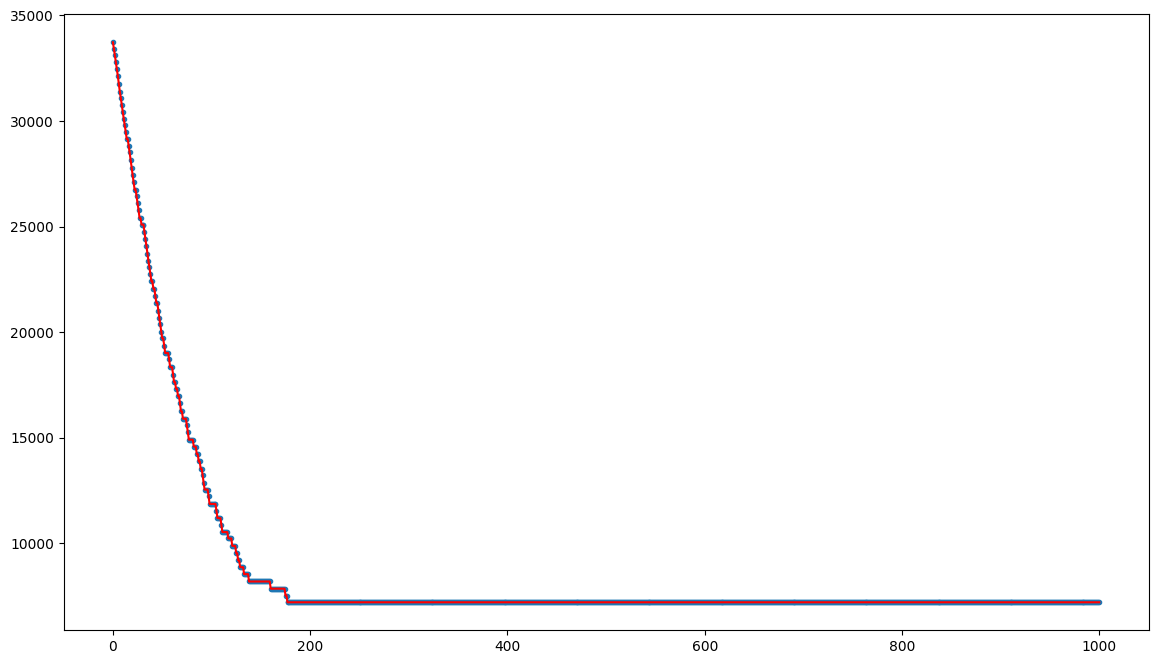

In [37]:
solution = np.full(NUM_SETS, True)

history = [cost(solution)]
tabu_list = []

for n in tqdm(range(UNIVERSE_SIZE)):
    new_solution = tweak(solution, tabu_list)
    if cost(new_solution) < cost(solution) and valid(new_solution):
        solution = new_solution
    history.append(cost(solution))

        
ic(cost(solution))
ic(history.index(cost(solution)))
##print(history)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

In [38]:
UNIVERSE_SIZE = 10000
NUM_SETS = 1000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [39]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

In [40]:
SETS

array([[False,  True, False, ..., False, False,  True],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [ True, False, False, ...,  True, False, False],
       [False,  True, False, ...,  True, False, False],
       [ True, False, False, ..., False, False, False]])

In [41]:
COSTS

array([4206.42208336, 4244.01752492, 4255.77232477, 4340.49363364,
       4185.28804627, 4267.53007698, 4338.13821914, 4281.64326737,
       4408.8509954 , 4375.83876704, 4204.07337938, 4397.05832527,
       4349.9164532 , 4312.23634388, 4248.71909015, 4342.84916435,
       4295.76068812, 4192.3316498 , 4427.7252309 , 4248.71909015,
       4117.25565091, 4283.99587736, 4218.16739056, 4279.29077488,
       4215.81809099, 4281.64326737, 4131.32299197, 4321.65357566,
       4394.70013598, 4208.77090657, 4218.16739056, 4213.46891044,
       4119.59990474, 4361.69758725, 4194.67975683, 4187.63579447,
       4291.05441187, 4213.46891044, 4124.28877619, 4161.81715792,
       4397.05832527, 4215.81809099, 4180.59290909, 4100.84927462,
       4140.70364003, 4364.05416149, 4187.63579447, 4032.94376514,
       3937.1168582 , 4114.91151841, 4265.17829067, 4354.62855918,
       4309.88232787, 4394.70013598, 4251.07005017, 4279.29077488,
       4201.72479469, 4255.77232477, 4201.72479469, 4283.99587

In [42]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

In [43]:
def tweak(solution, tabu_list, tabu_tenure=5):
    new_solution = solution.copy()
    index = None
    attempts = 0
    max_attempts = 150  # Limit the number of attempts to avoid infinite loops

    while (index is None or np.random.random() < 0.4) and attempts < max_attempts:
        index = np.random.randint(0, NUM_SETS)
        if index not in tabu_list:
            new_solution[index] = not new_solution[index]
            tabu_list.append(index)
            if len(tabu_list) > tabu_tenure:
                tabu_list.pop(0)  # Maintain the tabu list size
            break
        attempts += 1

    return new_solution

100%|██████████| 10000/10000 [00:03<00:00, 2519.40it/s]
ic| cost(solution): np.float64(132245.83168621233)
ic| history.index(cost(solution)): 6349


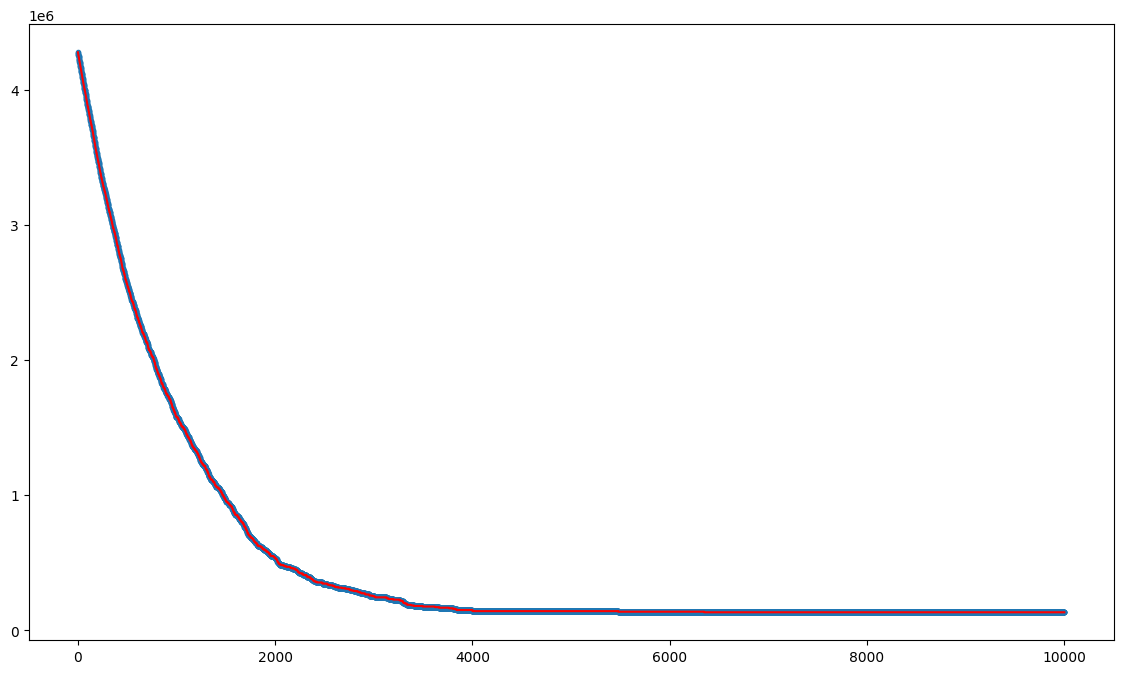

In [44]:
solution = np.full(NUM_SETS, True)

history = [cost(solution)]
tabu_list = []

for n in tqdm(range(UNIVERSE_SIZE)):
    new_solution = tweak(solution, tabu_list)
    if cost(new_solution) < cost(solution) and valid(new_solution):
        solution = new_solution
    history.append(cost(solution))

        
ic(cost(solution))
ic(history.index(cost(solution)))
##print(history)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

In [ ]:
UNIVERSE_SIZE = 100000
NUM_SETS = 10000
DENSITY = 0.1

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [ ]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

In [ ]:
solution = np.full(NUM_SETS, True)

history = [cost(solution)]
tabu_list = []

for n in tqdm(range(UNIVERSE_SIZE)):
    new_solution = tweak(solution, tabu_list)
    if cost(new_solution) < cost(solution) and valid(new_solution):
        solution = new_solution
    history.append(cost(solution))

        
ic(cost(solution))
ic(history.index(cost(solution)))
##print(history)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

In [ ]:
UNIVERSE_SIZE = 100000
NUM_SETS = 10000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [ ]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

In [ ]:
solution = np.full(NUM_SETS, True)

history = [cost(solution)]
tabu_list = []

for n in tqdm(range(UNIVERSE_SIZE)):
    new_solution = tweak(solution, tabu_list)
    if cost(new_solution) < cost(solution) and valid(new_solution):
        solution = new_solution
    history.append(cost(solution))

        
ic(cost(solution))
ic(history.index(cost(solution)))
##print(history)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

In [ ]:
UNIVERSE_SIZE = 100000
NUM_SETS = 10000
DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [ ]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

In [ ]:
solution = np.full(NUM_SETS, True)

history = [cost(solution)]
tabu_list = []

for n in tqdm(range(UNIVERSE_SIZE)):
    new_solution = tweak(solution, tabu_list)
    if cost(new_solution) < cost(solution) and valid(new_solution):
        solution = new_solution
    history.append(cost(solution))

        
ic(cost(solution))
ic(history.index(cost(solution)))
##print(history)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Have Fun!

In [29]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

ic| valid(solution): np.True_
    cost(solution): np.float64(311.58944498102085)


(np.True_, np.float64(311.58944498102085))

In [30]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), cost(solution)

ic| valid(solution): np.False_
    cost(solution): np.float64(122.15467630038168)


(np.False_, np.float64(122.15467630038168))